NAME: ARPAN SURABHI

STUDENT NUMBER: 19250426

PYTHON ML ASSIGNMENT

In this assignment, our complete focus is to use a machine learning algorithm to predict the response.  There is a package in python called "Sklearn" which includes some machine learning algorithms and functions that could be helpful. This package is somehow connected to numpy, scipy, data management and graph plotting packages. 
Using a cross-validated K-nearest neighbour machine learning algorithm, we need to predict the house price data using the location variables north and east and the floor area variable. Once the house price is predicted, we need to construct a 3-D plot of the house price for:
1) Average floor area
2) Floor area of 75 square metres
3) Floor area of 125 sqaure metres

We will be needing functions from pandas and numpy packages like reading csv file, finding out the mean of array etc. Loading these packages:

In [6]:
import numpy as np
import pandas as pd


Reading the csv file (making sure that CSV file is available in the present working folder):

In [7]:
hp = pd.read_csv('hpdemo.csv',dtype=float)

Check the CSV has been inputted correctly or not. Printing it:

In [8]:
print(hp)

          ID      east     north     price  fl_area
0        1.0  523800.0  179700.0  107000.0     50.0
1        2.0  533200.0  170900.0   55500.0     66.0
2        3.0  514600.0  175800.0  103000.0     90.0
3        4.0  516000.0  171000.0  187000.0    125.0
4        5.0  533700.0  169200.0   43000.0     50.0
...      ...       ...       ...       ...      ...
1400  1401.0  515600.0  173100.0   68500.0     44.0
1401  1402.0  513200.0  186500.0   58500.0     59.0
1402  1403.0  542900.0  189500.0  247000.0    185.0
1403  1404.0  524900.0  185300.0  153000.0     96.0
1404  1405.0  522000.0  185400.0  146250.0    111.0

[1405 rows x 5 columns]


Scaling of variables in a dataset is very important before applying any machine learning algorithm to it. There could be a case that we are considering 10 variables to process out of which 4 are in metres and other 6 are in square metres. Here, variables in the meter can dominate the variables in a square meter. In our case, we are considering floor area which would be in sqaure metres and north and east coordinates which might be in metres. Hence, scaling must be used. We can scale the variables in two ways: by Z-score (which gives mean 0 and standard deviation 1) or by maximum and minimum values.

For scaling, "Sklearn" package consist of a function called "StandardScaler" which provides a python object use to do variable scaling. With this dataset we want to scale "east", "north" and "fl_area". To use the scaler object, we first need to use "fit" method and then the transform to get the Zscores of the variables:

In [9]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_scaler.fit(hp[['east','north','fl_area']])
X = x_scaler.transform(hp[['east','north','fl_area']])

Now, we need to choose the machine learning algorithm. For this dataset, K-nearest algorithm would suit really well as house pricing can be based on the prices of house nearby with same floor area.
For that we need the tune the parameters for K-nearest algorithm like:
1) how many nearest neighbours we need to consider?
2) As a predictor uniform weighted mean or distance weighted mean?
3) Euclidean or City Block distance metric?

To use K-nearest neighbors algorithm in python, we need to import "KNeighborsRegressor" from "sklearn.neighbors":  

In [10]:
from sklearn.neighbors import KNeighborsRegressor as NN

This NN can create a nearest neighbour object (regression object) based on tuning parameters that we provide k=6, uniform weighted mean and p=2:

In [11]:
reg_object = NN(n_neighbors=6,weights='uniform',p=2)

To find out the best combination for k-value, weight and p, cross validation is required to go through each combination and find out which case provides the less error rate which is known as "cross-validation grid search". There are two methods commonly used for regression "root mean square error (RMSE)" and "mean absolute error (MAE)".
To evaluate which tuning parameter is best to use, we import "make_scorer" to produce a object for scoring and "mean_absolute_error" which type of scorer will be used. Using these two function, final object is being created.

In [12]:
from sklearn.metrics import mean_absolute_error, make_scorer
mae = make_scorer(mean_absolute_error, greater_is_better=False)

To perform "cross-validation grid search", we need to use function "GridsearchCV" which is part of package "sklearn.grid_search".
GridSearchCV() consist of various parameters:
1) estimator = it defines which machine learning algorithm to be used.
2) scoring = it defines which scoring method to use, mean absolute error is chosen here.
3) param_grid = all the possibilties for K, weights and p are mentioned in this.

In [13]:
from sklearn.model_selection import GridSearchCV
opt_nn = GridSearchCV(
    estimator = NN(),
    scoring = mae,
    param_grid = {
        'n_neighbors':range(1,35),
        'weights':['uniform','distance'],
        'p':[1,2]})

The "opt_nn" regression object we created, can perform fit and predict using data variables and response variable with performing cross-validation search. 

There is better way to do all this scaling and applying machine learning algorithm by using pipeline method by importing pipeline from Sklearn.pipeline. Pipeline consists of a complete process which includes the scaling of data first, calibrating and making direct predictions from the original data.

In [14]:
from sklearn.pipeline import Pipeline

Like earlier we used the GridSearchCV method to find out the best tuning parameters for the model, same we will use with this case as well.
"pipe" variable is being created using pipeline function that is doing both scaling and applying nearest neighbour machine learning algorithm. Parameters in param_grid in this case is different than that we used earlier:

In [15]:
pipe = Pipeline([('zscores',StandardScaler()),('NNreg',NN())])
opt_nn2 = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,35),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2]})

Object created from pipeline acts like a regression model. It has predict and fit methods linked to it. Fitting the model using the object "opt_nn2" created above:

In [16]:
opt_nn2.fit(hp[['east','north','fl_area']],hp['price']/1000.0)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('zscores',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('NNreg',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
            

Predicting the response from the data provided using the object "opt_nn2":

In [17]:
print(opt_nn2.predict([[523800.0,179750.0,55.0]]))

[122.53520623]


Now, for visualization we are creating a grid for the input data. 
100X100 grid for easting from 505000 to 555800 and 100X100 grid for northings from 158400 and 199900.

In [18]:
east_mesh, north_mesh = np.meshgrid(
    np.linspace(505000,555800,100),
    np.linspace(158400,199900,100))

To create the grid for floor area, initially we create a grid of same size as northing and easting with "zero" values. After creating it, we assign average value of floor area in the data set to every element of grid:

In [19]:
fl_mesh = np.zeros_like(east_mesh)
fl_mesh[:,:] = np.mean(hp['fl_area'])

To provide the data in proper format as expected, it's required to unravel it. So, whenever predict function reads in the data, it would see it as a series values of easting, northing and floor price.

In [20]:
grid_predictor_vars = np.array([east_mesh.ravel(),
    north_mesh.ravel(),fl_mesh.ravel()]).T 

Using the predict method on regression object to get the predicted values for the grid created above:

In [21]:
hp_pred = opt_nn2.predict(grid_predictor_vars)

Once the prediction is done, plotting requires value to be in grid format. In python, function called reshape could be used to re-structure the data in grid format.

In [22]:
hp_mesh = hp_pred.reshape(east_mesh.shape)

Assignment part-a) 3-Dimension plot of house prices predicted for a house with the average floor area:

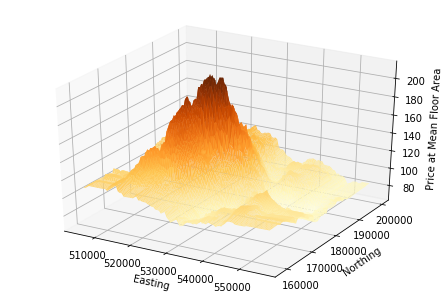

In [23]:
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure()
ax = Axes3D(fig)
ax.plot_surface(east_mesh, north_mesh, hp_mesh, rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Price at Mean Floor Area')
pl.show()

We can club all the tasks performed above in a function, which makes the things easier. This function would expect two parameters only, regression object and the floor area for which house prices need to be predicted:

In [24]:
def surf3d(pipe_model,fl_area):
    east_mesh, north_mesh = np.meshgrid(
        np.linspace(505000,555800,100),
        np.linspace(158400,199900,100))
    fl_mesh = np.zeros_like(east_mesh)
    fl_mesh[:,:] = fl_area
    grid_predictor_vars = np.array([east_mesh.ravel(),
        north_mesh.ravel(),fl_mesh.ravel()]).T
    hp_pred = pipe_model.predict(grid_predictor_vars)
    hp_mesh = hp_pred.reshape(east_mesh.shape)
    fig = pl.figure()
    ax = Axes3D(fig)
    ax.plot_surface(east_mesh, north_mesh, hp_mesh, 
        rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Price')
    pl.show()
    return

Assignment part-a) 3-Dimension plot of house prices predicted for a house with the average floor area:

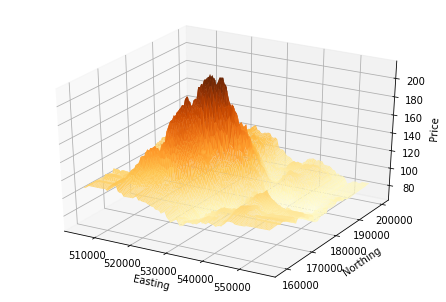

In [25]:
pl.close()
surf3d(opt_nn2,np.mean(hp['fl_area']))
pl.show()

Obervation from plot: The highest predicted price with average floor area is around 180 thousand pounds whose grid reference is between 520000-530000E and 180000-200000N. Also, house prices abruptly falls down on moving further more towards east after 520000E.

Assignment part-b) 3-Dimension plot of house prices predicted for a house with the 75 square metres floor area:

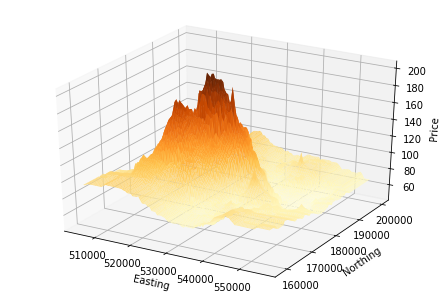

In [26]:
pl.close()
surf3d(opt_nn2,75.0)
pl.show()

Obervation from plot: The highest predicted price with 75 square metres floor area is around 160 thousand pounds whose grid reference is between 520000-530000E and 190000-200000N. Also, house prices abruptly falls down on moving further more towards east after 520000E.

Assignment part-c) 3-Dimension plot of house prices predicted for a house with the 125 square metres floor area:

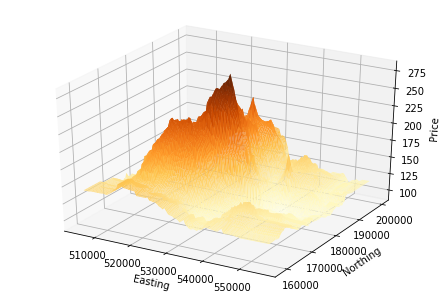

In [27]:
pl.close()
surf3d(opt_nn2,125.0)
pl.show()

Obervation from plot: The highest predicted price with 125 square metres floor area is around 230 thousand pounds whose grid reference is between 510000-530000E and 190000-200000N. Also, house prices abruptly falls down on moving further more towards east after 520000E.